# Spaceship Titanic

#### "If You're Not Embarrassed By The First Version Of Your Product, You’ve Launched Too Late" 
##### - Reid Hoffman, LinkedIn Founder

## Description

This is my EDA for Spaceship Titanic Kaggle Competition, and is my very first kernelll as well. The idea is similar to the original competition: Titanic - Machine Learning from disaster. You can find both HERE

"Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!"

## Objective

"To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system."

## Questions

- How many where transported? Rate?
- Does passangers traveling in groups where affected? How big are those groups? What about the solo travelers?
- Where was the passangers comming from? any pattern with the departure HomePlanet? or the Destination?
- What about passangers that were in CryoSleeping stage? How old are they? Where they all VIP users passangers?
- Does the side of the ship where it was hit matter? and the deck?
- And what about passangers spending money on board

## Conclusions

- Pretty much half of all the passangers were transported
- Most of them were traveling solo or in small groups
- Passangers coming from Europe had more chances to be transported, unlike the ones coming from Earth. Looks like Europe wont be part of Earth by 2912, weird
- Just 35% of passangers where in CryoSleep, but more than 80% of those were transported, there is a strong correlation here
- Aprox just 2.5% of passangers have a VIP status, but almost 90% of them where not in CryoSleep (as opposed to my thought). But thinking this twice, this logical. Why on earth will you decide to be in CryoSleep if you pay a lot of money for a VIP seat?
- There is almost no gap between the rate of Kids and Seniors (<18 and >65) in CryoSleep, but there is a big one for Young Adults (>18 and <26), probably because they wanted to party on board (as I would) and not to be sleeping
- PENDING ANALYSIS -  There were way more passangers in lower decks F and G, 
- With the assumption that all cabins in the ship where equally distributed betweeb both sides, the transported rate at Starboard (right of the ship) is considerably  higher
- Passengers heading to 55 Cancri-e were most likely to be transported than the ones going toTRAPPIST-1e by a few
- Most than half of the passangers had no expenses on board
- Pretty much all of the transported passangers had no expeneses on Spa either VRDeck, even though they did have expenses in Food and Shopping Mall. Highly likely that this happens because they where in CryoSleep


## LogBook

In [1]:
#  7 Oct 2022   >>>   Project Start
#  7 Oct 2022   >>>   Individual Features Analysis
#  8 Oct 2022   >>>   Data Wrangling
# 11 Oct 2022   >>>   EDA
# 14 Oct 2022   >>>   Data Modeling
# 15 Oct 2022   >>>   Asthetics and Proyect End
#  5 Nov 2022   >>>   Reduced version for Medium

# Author: Andres Montes de Oca
# GitHub: https://github.com/AndresMontesDeOca
# Competition #01 (https://www.kaggle.com/competitions/spaceship-titanic)

## Load Data and Info

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='ticks', context='notebook', palette='pastel')

train = pd.read_csv('Data/train.csv')
data = train
test = pd.read_csv('Data/test.csv')

print(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Exploratory Data Analysis & Feature Engineering

### Transported (Target)

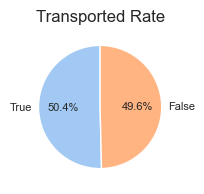

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
data['Transported'].value_counts().plot(kind='pie', 
        autopct='%.1f%%', textprops={'fontsize':8}, startangle=90).set_title('Transported Rate')
ax.set_ylabel('')
plt.show()

# Transported is well balanced

### PassengerId (Feature)

In [4]:
print('Nulls:', data.PassengerId.isnull().sum(), '\n')
print(data.PassengerId.head())

# We will have to split the GroupId form this Feature, there are no nulls

Nulls: 0 

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object


### GroupSize (Created Feature)

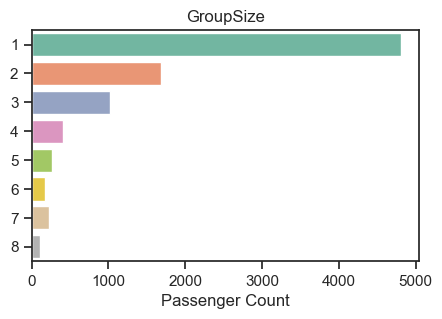

In [5]:
data['GroupId'] = data['PassengerId'].str.split('_', expand=True)[0]

# Grouping by GroupId to count each group size
GroupId_size_serie = data.groupby('GroupId').size().rename('GroupSize', inplace=True)

# First we add how many passengers are in the group
data = pd.merge(left=data, right=GroupId_size_serie, left_on='GroupId', right_on='GroupId', how='left')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
sns.countplot(y=data['GroupSize'], palette='Set2')
ax.set_ylabel('')
ax.set_xlabel('Passenger Count')

plt.title('GroupSize')
plt.show()

# Few Passangers in big groups

### IsAlone (Created Feature)

True     4805
False    3888
Name: IsAlone, dtype: int64 



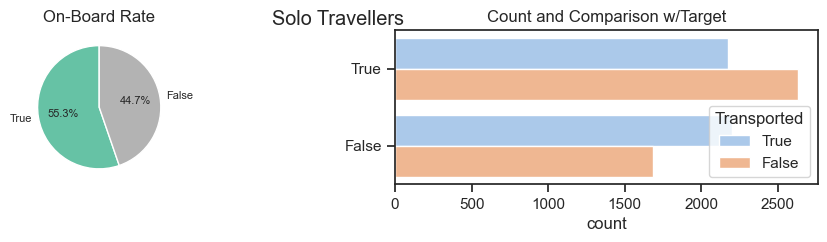

In [6]:
# IsAlone Feature Generation (Solo Travelers)

data.loc[:, 'IsAlone'] = data['GroupSize']==1 # Or we can leave it as it is, maybe improves the results
# data.rename(columns={'Group_size':'IsAlone'}, inplace=True)

print(data['IsAlone'].value_counts(), '\n')
# Plots
fig, ax = plt.subplots(1, 2, figsize=(12, 2))

# PieChart
data['IsAlone'].value_counts(dropna=False).sort_index(ascending=False).plot(kind='pie', autopct='%.1f%%', ax=ax[0], \
                                                                cmap='Set2', startangle=90, textprops={'fontsize':8})
ax[0].set_ylabel('')
ax[0].set_title('On-Board Rate')

# CountPlot
sns.countplot(y=data['IsAlone'], hue=data['Transported'], ax=ax[1], order=[True, False], hue_order=[True, False])
ax[1].set_ylabel('')
ax[1].set_title('Count and Comparison w/Target')

fig.suptitle('Solo Travellers\n')
plt.show()

# There are more Solo Travellers, but they have lower Transported Rate

### HomePlanet (Feature)

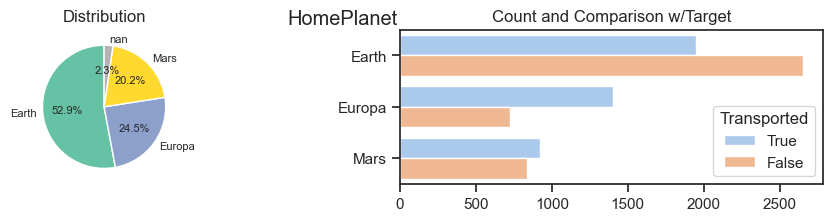

In [7]:
# Plots
fig, ax = plt.subplots(1, 2, figsize=(12, 2))

# PieChart
data['HomePlanet'].value_counts(dropna=False).plot(kind='pie', autopct='%.1f%%', ax=ax[0], \
                                    startangle=90, cmap='Set2', textprops={'fontsize':8})
ax[0].set_ylabel('')
ax[0].set_title('Distribution')

# CountPlot
sns.countplot(y=data['HomePlanet'], order=data['HomePlanet'].value_counts().index, ax=ax[1], \
              hue=data['Transported'], hue_order=[True, False])

ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_title('Count and Comparison w/Target')

fig.suptitle('HomePlanet')
plt.show()

# There are 201 nulls
# Most coming from Earth
# Passangers from Europe have more chances to be Transported

### CryoSleep (Feature)

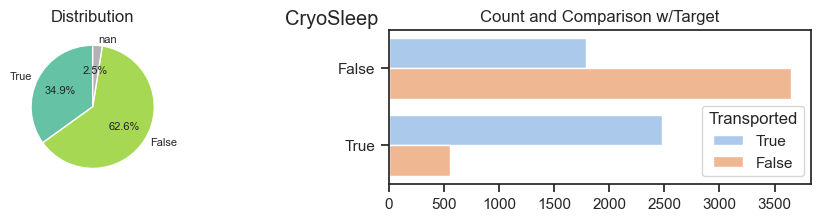

In [8]:
# Plots
fig, ax = plt.subplots(1, 2, figsize=(12, 2))

# PieChart
data['CryoSleep'].value_counts(dropna=False).sort_index(ascending=False).plot(kind='pie', cmap='Set2', \
                                    autopct='%.1f%%', ax=ax[0], startangle=90, textprops={'fontsize':8})
ax[0].set_ylabel('')
ax[0].set_title('Distribution')

# CountPlot
sns.countplot(y=data['CryoSleep'], hue=data['Transported'], ax=ax[1], hue_order=[True, False])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_title('Count and Comparison w/Target')

fig.suptitle('CryoSleep')
plt.show()

# Just 1/3 are in CryoSleep
# There are 217 Nulls
# Strong correlation with Target Variable

#### Correlation with VIP

Total VIP Passengers: 199


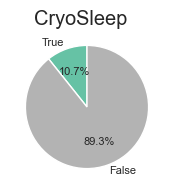

In [9]:
print('Total VIP Passengers:', data[data.VIP==True].shape[0])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
data[data.VIP==True].CryoSleep.value_counts().sort_index(ascending=False).plot(kind='pie', autopct='%.1f%%', \
                                                        cmap='Set2', startangle=90, textprops={'fontsize':8})
ax.set_ylabel('')
plt.suptitle('CryoSleep')
plt.show()

# There few VIP Passengers
# Strong correlation, VIP passengers dont want to be put to sleep

#### Correlation with Age

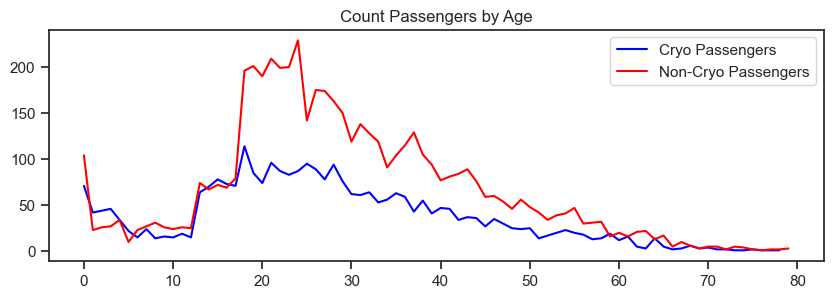

In [10]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
data[data.CryoSleep==True].Age.value_counts().sort_index().plot(title='Count Passengers by Age', color='blue', label='Cryo Passengers')
data[data.CryoSleep==False].Age.value_counts().sort_index().plot(color='red', label='Non-Cryo Passengers')

plt.legend()
plt.show()

# Kids (<18) and Seniors (>65) have similar Rate
# The gap between both gets gradually reduced for adults (18 to 65 years) 

### Cabin (Feature)

In [11]:
# The cabin number where the passenger is staying. Takes the form deck/num/side, 
# where side can be either P for Port or S for Starboard.

print('Nulls Count Cabin:', data[data.Cabin.isnull()].shape[0], '\n')
print(data['Cabin'].head()) # PortSide/StarboardSide: Left/Right

Nulls Count Cabin: 199 

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object


#### FillNa (GroupId Approach)

In [12]:
# GroupID DIM table for completing NA values
GroupId_DIM = data[['GroupId', 'Cabin']].drop_duplicates(subset='GroupId').set_index('GroupId').squeeze()
display(GroupId_DIM.head())

data.Cabin.fillna('GroupId_DIM')

# SQL Merge (should be an easier way for sure)
data.loc[data.Cabin.isnull(), 'Cabin']= pd.merge(left=data.loc[data.Cabin.isnull()][['GroupId', 'Cabin']],
         right=GroupId_DIM,
         how='left',
         left_on='GroupId',
         right_index=True
        )['Cabin_y']

print('Nulls Count Cabin:', data[data.Cabin.isnull()].shape[0], '\n')

# There will be another fillna() for each individual fature after split (Deck, Num, Side)

GroupId
0001    B/0/P
0002    F/0/S
0003    A/0/S
0004    F/1/S
0005    F/0/P
Name: Cabin, dtype: object

Nulls Count Cabin: 134 



#### Split (Cabin)

In [13]:
col_names = ['Deck', 'Num', 'Side']
data_Cabin = data['Cabin'].str.split('/', expand=True).set_axis(col_names, axis=1)

# Converting Num to Int
data_Cabin.loc[data_Cabin.Num.notnull(), 'Num'] = \
                data_Cabin.loc[data_Cabin.Num.notnull()].Num.astype(int) # Probably there is an easier way

display(data_Cabin)

# Concat
data = pd.concat([data, data_Cabin], axis=1)

,Deck,Num,Side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
8688,A,98,P
8689,G,1499,S
8690,G,1500,S
8691,E,608,S


### Deck (Created Feature)

F      2804
G      2578
E       880
B       790
C       758
D       483
A       261
NaN     134
T         5
Name: Deck, dtype: int64


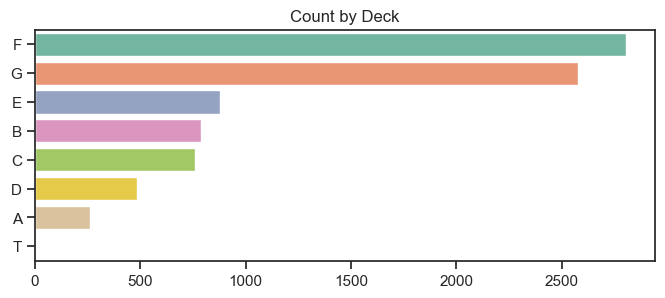

In [14]:
# Working but ugly
print(data['Deck'].value_counts(dropna=False))

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
sns.countplot(y=data['Deck'], palette='Set2', order=data['Deck'].value_counts().index)
ax.set_ylabel('')
ax.set_xlabel('')

plt.title('Count by Deck')
plt.show()

# 199 nulls

### Side (Created Feature)

S      4323
P      4236
NaN     134
Name: Side, dtype: int64 



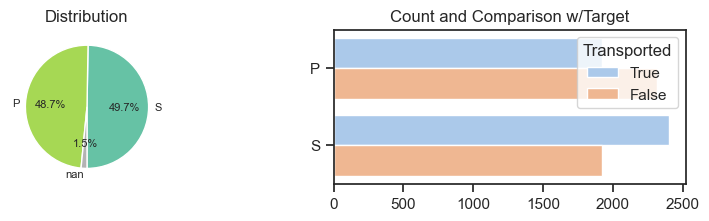

Nulls for Deck, Side and Num are the same: 134


In [15]:
print(data.Side.value_counts(dropna=False), '\n')

# Plot
fix, ax = plt.subplots(1, 2, figsize=(10, 2))

# PieChart
data['Side'].value_counts(dropna=False).sort_index(ascending=False). \
                    plot(kind='pie', autopct='%.1f%%', ax=ax[0], startangle=270, cmap='Set2', textprops={'fontsize':8})
ax[0].set_ylabel('')
ax[0].set_title('Distribution')

# CountPlot
sns.countplot(y=data['Side'], hue=data['Transported'], ax=ax[1], hue_order=[True, False])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_title('Count and Comparison w/Target')
plt.show()

# Same # nulls as Deck, maybe are related?
print('Nulls for Deck, Side and Num are the same:', \
      data[data.Deck.isnull() & data.Side.isnull() & data.Num.isnull()].shape[0]) # 134 = All the same

### Destination (Feature)

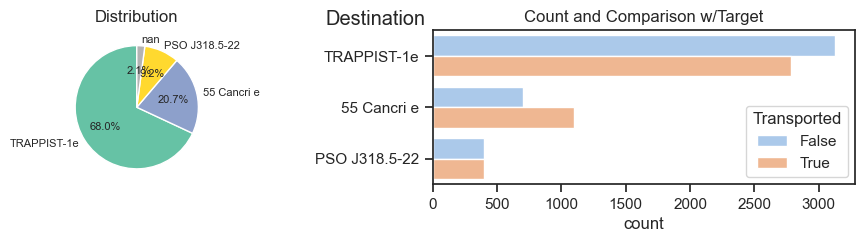

In [16]:
# Plots
fig, ax = plt.subplots(1, 2, figsize=(12, 2))

# PieChart
data['Destination'].value_counts(dropna=False).plot(kind='pie', autopct='%.1f%%', ax=ax[0], startangle=90, \
                                                    cmap='Set2', textprops={'fontsize':8})
ax[0].set_ylabel('')
ax[0].set_title('Distribution')

# CountPlot
sns.countplot(y=data['Destination'], order=data['Destination'].value_counts().index, ax=ax[1], hue=data['Transported'])
ax[1].set_ylabel('')
ax[1].set_title('Count and Comparison w/Target')

plt.suptitle('Destination')
plt.show()

# Similar to HomePlanet. Most passengers heading TRAPPIST-1e, 182 Nulls
# 55 Cancri e looks like they have a better Transported Rate

### VIP (Feature)

True      199
False    8291
NaN       203
Name: VIP, dtype: int64 



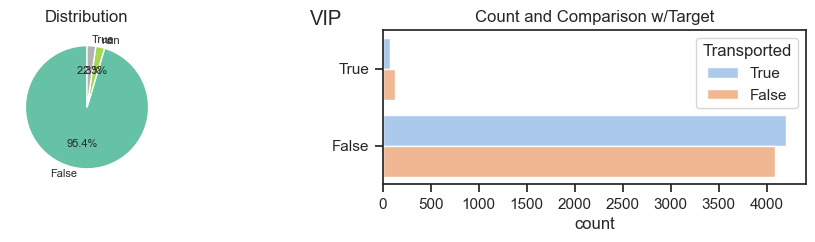

In [17]:
print(data['VIP'].value_counts(dropna=False).sort_index(ascending=False), '\n')

# Plot
fig,ax=plt.subplots(1,2,figsize=(12,2))

# ax[0]
data['VIP'].value_counts(dropna=False).plot(kind='pie', autopct='%.1f%%', startangle=90, cmap='Set2', \
                                            ax=ax[0], textprops={'fontsize':8})
ax[0].set_ylabel('')
ax[0].set_title('Distribution')

# ax[1]
sns.countplot(y=data['VIP'], hue=data['Transported'], order=[True, False], hue_order=[True, False], ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('Count and Comparison w/Target')
fig.suptitle('VIP')
plt.show()

# Few VIPS and few Nulls, nothing important here

 ### RoomService (Feature)

Nulls: 181 

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64


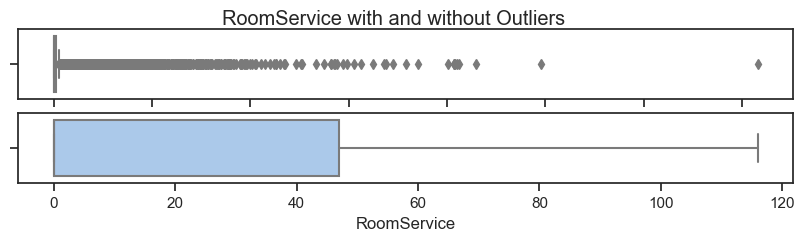

In [18]:
print('Nulls:', data['RoomService'].isnull().sum(), '\n')
print(data['RoomService'].describe())

# Plot
fig, ax = plt.subplots(2, 1, figsize=(10, 2))

# ax[0]
sns.boxplot(x=data['RoomService'], showfliers=True, ax=ax[0])
ax[0].set_ylabel('')

# ax[1]
sns.boxplot(x=data['RoomService'], showfliers=False, ax=ax[1])
ax[1].set_ylabel('')

fig.suptitle('RoomService with and without Outliers')
plt.show()

# ax[0] xticks shold be added

### FoodCourt (Feature)

Nulls: 183 

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64


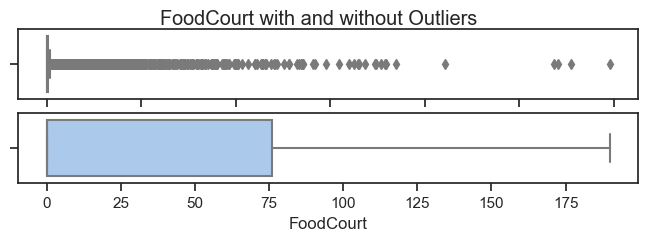

In [19]:
print('Nulls:', data['FoodCourt'].isnull().sum(), '\n')
print(data['FoodCourt'].describe())

# Plot
fig, ax = plt.subplots(2, 1, figsize=(8, 2))

# ax[0]
sns.boxplot(x=data['FoodCourt'], showfliers=True, ax=ax[0])
ax[0].set_ylabel('')

# ax[1]
sns.boxplot(x=data['FoodCourt'], showfliers=False, ax=ax[1])
ax[1].set_ylabel('')

fig.suptitle('FoodCourt with and without Outliers')
plt.show()

# ax[0] xticks shold be added

### ShoppingMall (Feature)

Nulls: 208 

count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64


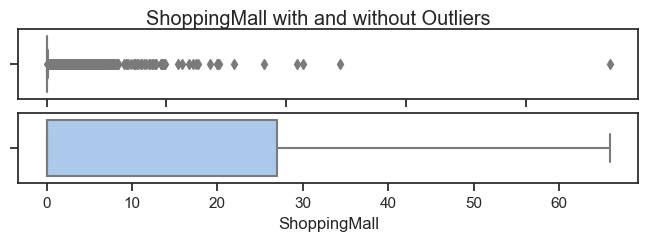

In [20]:
print('Nulls:', data['ShoppingMall'].isnull().sum(), '\n')
print(data['ShoppingMall'].describe())

# Plot
fig, ax = plt.subplots(2, 1, figsize=(8, 2))

# ax[0]
sns.boxplot(x=data['ShoppingMall'], showfliers=True, ax=ax[0])
ax[0].set_ylabel('')

# ax[1]
sns.boxplot(x=data['ShoppingMall'], showfliers=False, ax=ax[1])
ax[1].set_ylabel('')

fig.suptitle('ShoppingMall with and without Outliers')
plt.show()

# ax[0] xticks shold be added

### VRDeck (Feature)

Nulls: 188 

count     8505.000000
mean       304.854791
std       1145.717189
min          0.000000
25%          0.000000
50%          0.000000
75%         46.000000
max      24133.000000
Name: VRDeck, dtype: float64


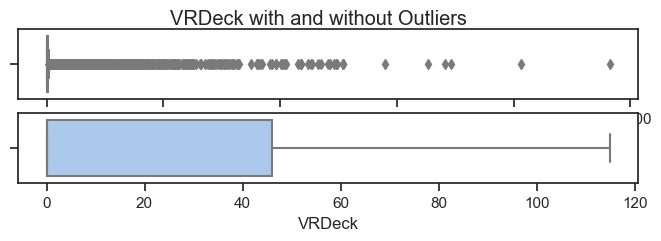

In [21]:
print('Nulls:', data['VRDeck'].isnull().sum(), '\n')
print(data['VRDeck'].describe())

# Plot
fig, ax = plt.subplots(2, 1, figsize=(8, 2))

# ax[0]
sns.boxplot(x=data['VRDeck'], showfliers=True, ax=ax[0])
ax[0].set_ylabel('')

# ax[1]
sns.boxplot(x=data['VRDeck'], showfliers=False, ax=ax[1])
ax[1].set_ylabel('')

fig.suptitle('VRDeck with and without Outliers')
plt.show()

# ax[0] xticks shold be added

### Spa (Feature)

Nulls: 183 

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64


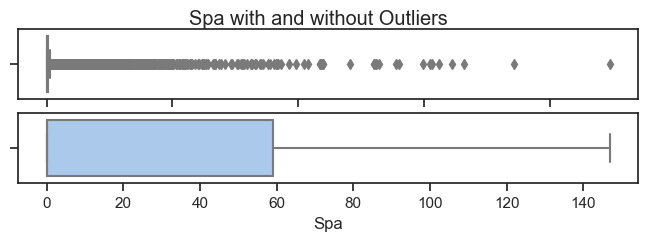

In [22]:
print('Nulls:', data['Spa'].isnull().sum(), '\n')
print(data['Spa'].describe())

# Plot
fig, ax = plt.subplots(2, 1, figsize=(8, 2))

# ax[0]
sns.boxplot(x=data['Spa'], showfliers=True, ax=ax[0])
ax[0].set_ylabel('')

# ax[1]
sns.boxplot(x=data['Spa'], showfliers=False, ax=ax[1])
ax[1].set_ylabel('')

fig.suptitle('Spa with and without Outliers')
plt.show()

# ax[0] xticks shold be added
# Weird values, probably we will ignore this Feature

## Continuous Features Comparation (PairPlot)

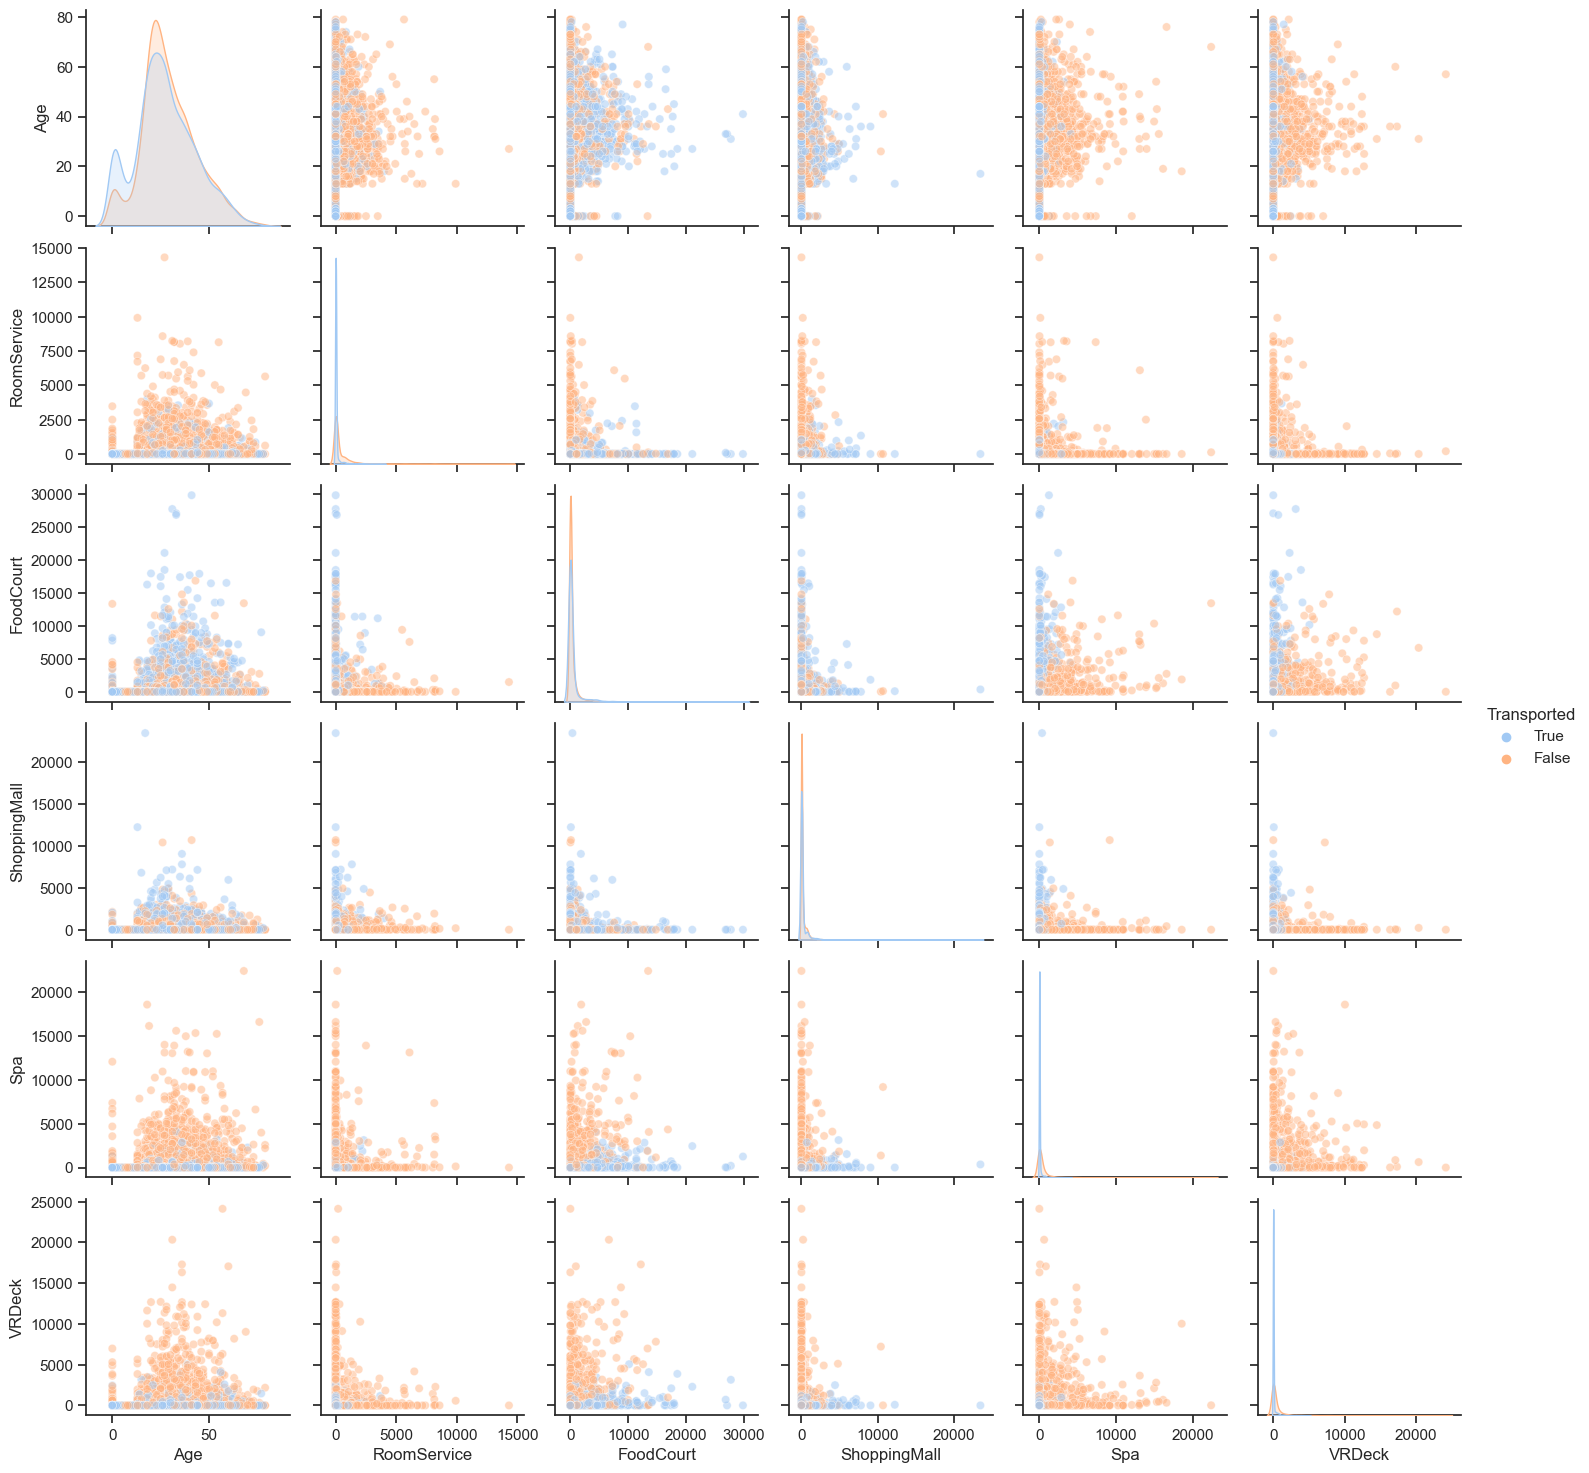

In [23]:
# Complete NA values with 0
data_plot = pd.concat([data.select_dtypes(['float64']).fillna(0), data['Transported']], axis=1)

# Plot
sns.pairplot(data=data_plot, hue='Transported', hue_order=[True, False],  plot_kws={'alpha': 0.5})
plt.show()

# Passangers with no expenses on Spa either VRDeck, are mostly in Cryo (ofc, they are sleeping)
# Probably creating a new single feature for expenses could improve the model performance

## Correcting and Completing Nulls

### HomePlanet (Feature)

In [24]:
# Counting and Checking nulls
print('Nulls Count:', data[data.HomePlanet.isnull()].shape[0], '\n')

Nulls Count: 201 



#### Groups Approach

In [25]:
# Passangers in Groups
display('Passengers in groups', data[data.HomePlanet.isnull() & ~(data.IsAlone)]
        [['PassengerId', 'HomePlanet', 'IsAlone']].head())
print('In groups with other passengers',data[data.HomePlanet.isnull() & ~(data.IsAlone)].shape[0])

# We can get HomePlanet from GroupId for almost 50% of NA. Lets check if this is a valid approach

'Passengers in groups'

,PassengerId,HomePlanet,IsAlone
59,0064_02,NaN,False
113,0119_01,NaN,False
405,0444_02,NaN,False
407,0445_02,NaN,False
438,0470_02,NaN,False


In groups with other passengers 92


In [26]:
# Lets confirm all members of each group departed from the same HomePlanet

data_grp_groupid_homeplanet = data.groupby(['GroupId', 'HomePlanet']).size().to_frame('Count').reset_index()
display(data_grp_groupid_homeplanet.head())

# There are no duplicated GroupId, so all are from the same HomePlanet
print('Is GroupId unique?:', data_grp_groupid_homeplanet.GroupId.is_unique)

# Filling Passangers in Groups with value from same GroupId
data.loc[:, 'HomePlanet'] = data.sort_values(by=['GroupId', 'HomePlanet'])['HomePlanet'].fillna(method='ffill')
print('Nulls Count HomePlanet:', data.HomePlanet.isnull().sum())

,GroupId,HomePlanet,Count
0,0001,Europa,1
1,0002,Earth,1
2,0003,Europa,2
3,0004,Earth,1
4,0005,Earth,1


Is GroupId unique?: True
Nulls Count HomePlanet: 0


#### Mode Approach

In [27]:
# Filling Solo Travelers with the mode # Not Necesary, nulls already 0
# data.loc[data.HomePlanet.isnull() & data.IsAlone, 'HomePlanet'] = data.HomePlanet.mode()[0]

# print('Nulls Count HomePlanet:', data.HomePlanet.isnull().sum())

### CryoSleep (Feature)

In [28]:
# Counting and Checking nulls
print('Nulls Count CryoSleep:', data[data.CryoSleep.isnull()].shape[0], '\n')

Nulls Count CryoSleep: 217 



#### Amenites Approcah

In [29]:
# Users spending money onboard are not in Cryo
mask_amenities_expenses = (data.RoomService>0) | (data.FoodCourt>0) | (data.ShoppingMall>0) | (data.VRDeck>0)
data.loc[mask_amenities_expenses & data.CryoSleep.isnull(), 'CryoSleep'] = False

print('Nulls Count CryoSleep:', data[data.CryoSleep.isnull()].shape[0], '\n')

Nulls Count CryoSleep: 99 



#### Transported Approach

In [30]:
# Set True for Transported Passengers. Is this a good approach? Or is this a Data Leak?

display(data.loc[data.CryoSleep.isnull() & data.Transported][['CryoSleep', 'Transported']])
data.loc[data.CryoSleep.isnull() & data.Transported, 'CryoSleep'] = True

print('\nNulls Count CryoSleep:', data[data.CryoSleep.isnull()].shape[0], '\n')

,CryoSleep,Transported
92,NaN,True
111,NaN,True
175,NaN,True
266,NaN,True
392,NaN,True
...,...,...
7756,NaN,True
8155,NaN,True
8362,NaN,True
8620,NaN,True



Nulls Count CryoSleep: 28 



#### VIP Approach

In [31]:
# Set to False for VIPs, any there are just 2
print(data[data.CryoSleep.isnull()].VIP.value_counts())
data.loc[data.CryoSleep.isnull() & data.VIP, 'CryoSleep'] = False

print('\nNulls Count CryoSleep:', data[data.CryoSleep.isnull()].shape[0], '\n')

False    25
Name: VIP, dtype: int64

Nulls Count CryoSleep: 28 



#### Mode Approach

In [32]:
# For the rest
data['CryoSleep'].fillna(data['CryoSleep'].mode()[0], inplace=True)

print('\nNulls Count CryoSleep:', data[data.CryoSleep.isnull()].shape[0], '\n')


Nulls Count CryoSleep: 0 



### Destination (Feature)

In [33]:
print('Nulls Count Destination:', data[data.Destination.isnull()].shape[0], '\n')

Nulls Count Destination: 182 



#### Mode Approach

In [34]:
data['Destination'].fillna(data['Destination'].mode()[0], inplace=True)
print('Nulls Count Destination:', data[data.Destination.isnull()].shape[0], '\n')

Nulls Count Destination: 0 



### Age (Feature)

In [35]:
print('Nulls Count Age:', data[data.Age.isnull()].shape[0], '\n')

Nulls Count Age: 179 



#### Median Approach

In [36]:
# Unnecessary, we will deal with Continuous Features later on

# data['Age'].fillna(data['Age'].median(), inplace=True)

# print('Nulls Count Age:', data[data.Age.isnull()].shape[0], '\n')

### VIP (Feature)

In [37]:
print('Nulls Count VIP:', data[data.VIP.isnull()].shape[0], '\n')

Nulls Count VIP: 203 



#### Mode Approach

In [38]:
data['VIP'].fillna(data['VIP'].mode()[0], inplace=True)
print('Nulls Count VIP:', data[data.VIP.isnull()].shape[0], '\n')

Nulls Count VIP: 0 



### Age & Amenities (Continuous Features)

In [39]:
continuous_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck', 'Age'] #Age?

print('Nulls Count Amenities:', data[continuous_cols].isnull().sum())

Nulls Count Amenities: RoomService     181
FoodCourt       183
ShoppingMall    208
VRDeck          188
Age             179
dtype: int64


#### Median Approach

In [40]:
# Medians are 0, I'm not sure if this is a good approach

for col in continuous_cols:
    data[col].fillna(data[col].median(), inplace=True)


print('Nulls Count Amenities:', data[continuous_cols].isnull().sum())

Nulls Count Amenities: RoomService     0
FoodCourt       0
ShoppingMall    0
VRDeck          0
Age             0
dtype: int64


### Deck, Num, Side (Created Features)

In [41]:
print('Nulls Count Deck:', data[data.Deck.isnull()].shape[0], '\n')

Nulls Count Deck: 134 



#### DropNA

In [42]:
data.dropna(subset='Deck', inplace=True)

print('Nulls Count Deck:', data[data.Deck.isnull()].shape[0], '\n')

# Pending to try better approaches

Nulls Count Deck: 0 



## Features Selection and Convertion

In [43]:
X_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 
          'FoodCourt', 'ShoppingMall', 'VRDeck', 'GroupId', 'GroupSize', 'IsAlone', 'Deck', 'Num', 'Side']

X = data[X_cols]
y = data['Transported']

print(X.info())
print('Target size:', y.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8559 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8559 non-null   object 
 1   CryoSleep     8559 non-null   bool   
 2   Destination   8559 non-null   object 
 3   Age           8559 non-null   float64
 4   VIP           8559 non-null   bool   
 5   RoomService   8559 non-null   float64
 6   FoodCourt     8559 non-null   float64
 7   ShoppingMall  8559 non-null   float64
 8   VRDeck        8559 non-null   float64
 9   GroupId       8559 non-null   object 
 10  GroupSize     8559 non-null   int64  
 11  IsAlone       8559 non-null   bool   
 12  Deck          8559 non-null   object 
 13  Num           8559 non-null   object 
 14  Side          8559 non-null   object 
dtypes: bool(3), float64(5), int64(1), object(6)
memory usage: 894.3+ KB
None
Target size: (8559,)


## Nominal Features 

In [44]:
nominal_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Side', 'Deck']
X_nominals = data[nominal_cols].astype('category').reset_index(drop=True)
print(X_nominals.info())

# in doubt: IsAlone(correlated with GroupSize), Deck (Nominal?), Num (Ordinal?)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8559 entries, 0 to 8558
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   HomePlanet   8559 non-null   category
 1   CryoSleep    8559 non-null   category
 2   Destination  8559 non-null   category
 3   VIP          8559 non-null   category
 4   Side         8559 non-null   category
 5   Deck         8559 non-null   category
dtypes: category(6)
memory usage: 51.3 KB
None


#### Encoding

In [45]:
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder(handle_unknown='infrequent_if_exist', sparse=False, drop='first')

X_nominals_encoded = oh_encoder.fit_transform(X_nominals)
X_nominals_encoded = pd.DataFrame\
    (X_nominals_encoded, columns=oh_encoder.get_feature_names_out()) # DF and column names

display(X_nominals_encoded.head())

# Is ok OneHot on Deck with cardinality of 9?

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Side_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Ordinal Features

In [46]:
ordinal_cols = ['GroupSize']

X_ordinals = data[ordinal_cols].astype('category').reset_index(drop=True)
print(X_ordinals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8559 entries, 0 to 8558
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GroupSize  8559 non-null   category
dtypes: category(1)
memory usage: 8.8 KB
None


#### Encoding

In [47]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

X_ordinals_encoded = ord_encoder.fit_transform(X_ordinals)
X_ordinals_encoded = pd.DataFrame\
    (X_ordinals_encoded, columns=ord_encoder.get_feature_names_out()) # DF and column names

display(X_ordinals_encoded.head())

,GroupSize
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0


## Quantitative Features

In [48]:
X_continuous = data[continuous_cols].reset_index(drop=True)
print(X_continuous.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8559 entries, 0 to 8558
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RoomService   8559 non-null   float64
 1   FoodCourt     8559 non-null   float64
 2   ShoppingMall  8559 non-null   float64
 3   VRDeck        8559 non-null   float64
 4   Age           8559 non-null   float64
dtypes: float64(5)
memory usage: 334.5 KB
None


#### Encoding

In [49]:
from sklearn.preprocessing import KBinsDiscretizer

kbins_encoder = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

X_continuous_encoded = kbins_encoder.fit_transform(X_continuous)
X_continuous_encoded = pd.DataFrame(X_continuous_encoded, columns=kbins_encoder.get_feature_names_out()) # DF and column names
display(X_continuous_encoded.head())

# ain't sure if this is right

,RoomService,FoodCourt,ShoppingMall,VRDeck,Age
0,0.0,0.0,0.0,0.0,7.0
1,1.0,0.0,1.0,1.0,4.0
2,1.0,3.0,0.0,1.0,9.0
3,0.0,3.0,2.0,2.0,6.0
4,2.0,1.0,2.0,0.0,1.0


## Target Feature

In [50]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()

y_encoded = lb_encoder.fit_transform(data['Transported'])
y_encoded = pd.Series(y_encoded, name='Transported')

## Correlation

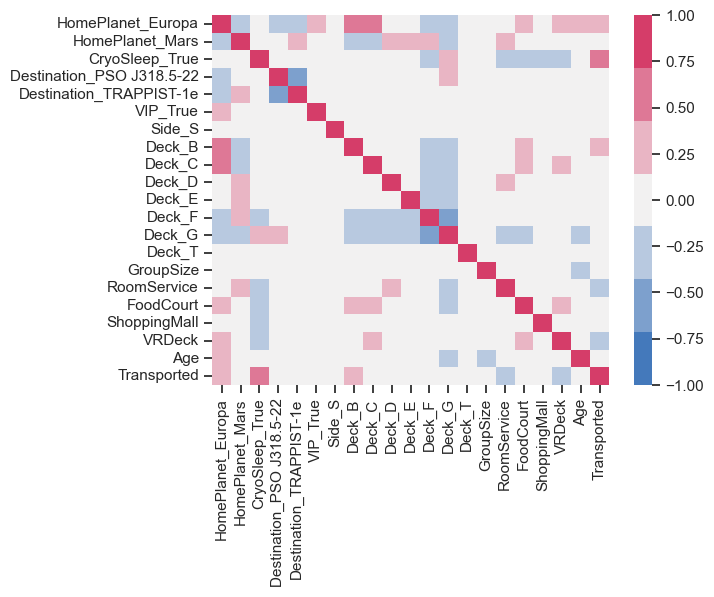

In [51]:
X_encoded = pd.concat([X_nominals_encoded, X_ordinals_encoded, X_continuous], axis=1)
data_tmp = pd.concat([X_encoded, y_encoded], axis=1)

div_pal = sns.diverging_palette(250, 0, center='light', as_cmap=False, n=7)

sns.heatmap(data_tmp.corr(), vmin=-1, vmax=1, cmap=div_pal)
plt.show()

# Probably some decks can be put together?

# Machine Learning Modeling

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

# Folds
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

#### Standarization

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_encoded[continuous_cols])
X_encoded[continuous_cols] = scaler.transform(X_encoded[continuous_cols]) # Comment for skipping Normalization

# Split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_encoded, y_encoded)

## Lazy Predict

In [54]:
# pip install lazypredict

import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score

models, predictions = LazyClassifier().fit(Xtrain, Xtest, ytrain, ytest)
display(models)


# Quick look at the performance of several models
# PipeLines pending

100%|██████████| 29/29 [00:14<00:00,  2.04it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.78,0.78,0.78,0.78,0.11
SVC,0.77,0.77,0.77,0.77,2.23
NuSVC,0.77,0.77,0.77,0.77,2.58
XGBClassifier,0.77,0.77,0.77,0.77,0.32
CalibratedClassifierCV,0.77,0.77,0.77,0.77,1.76
LinearSVC,0.77,0.77,0.77,0.77,0.43
LogisticRegression,0.77,0.77,0.77,0.77,0.03
AdaBoostClassifier,0.76,0.76,0.76,0.76,0.29
RandomForestClassifier,0.76,0.76,0.76,0.76,0.66


## LGBMClassifier

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1069
           1       0.80      0.76      0.78      1071

    accuracy                           0.78      2140
   macro avg       0.78      0.78      0.78      2140
weighted avg       0.78      0.78      0.78      2140
 

Best Score: 0.7871431589222108
Best HyperParameters: {'num_leaves': 53, 'learning_rate': 0.05, 'boosting_type': 'dart'} 



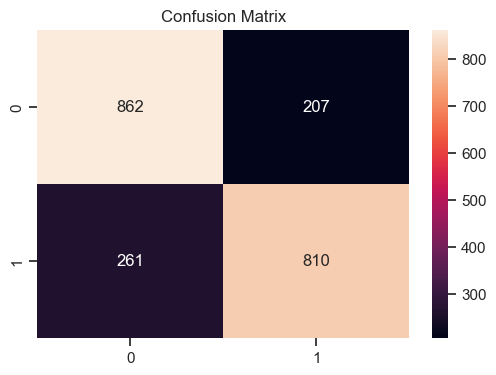

In [55]:
import lightgbm as lgb

# Hyper
boosting_type = ['gbdt', 'dart', 'goss', 'rf']
num_leaves = np.arange(50, 150, 1)
learning_rate = np.arange(.01, .1, .01)
param_grid = dict(boosting_type=boosting_type, num_leaves=num_leaves, learning_rate=learning_rate)

# Model
model_lgbm = RandomizedSearchCV(estimator=lgb.LGBMClassifier(), param_distributions=param_grid, cv=cv)
model_lgbm.fit(Xtrain, ytrain)
ypred = model_lgbm.predict(Xtest)

# Print Scores
print(classification_report(ytest, ypred), '\n')
print('Best Score:', model_lgbm.best_score_)
print('Best HyperParameters:', model_lgbm.best_params_, '\n')

# Confusion Matrix
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

## KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Hyper
n_neighbros = np.arange(1, 31, 1)
weights = ['uniform', 'distance']
param_grid = dict(n_neighbors=n_neighbros, weights=weights)

# Model
model_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(), 
                               param_distributions=param_grid, cv=cv)
model_knn.fit(Xtrain, ytrain)
ypred = model_knn.predict(Xtest)

# Print Scores
print(classification_report(ytest, ypred), '\n')
print('Best Score:', model_knn.best_score_)
print('Best HyperParameters:', model_knn.best_params_, '\n')

# Confusion Matrix
# fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='d')
# plt.title('Confusion Matrix')
# plt.show()

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1069
           1       0.79      0.74      0.76      1071

    accuracy                           0.77      2140
   macro avg       0.77      0.77      0.77      2140
weighted avg       0.77      0.77      0.77      2140
 

Best Score: 0.7632542821738704
Best HyperParameters: {'weights': 'uniform', 'n_neighbors': 13} 



# Naive-Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

# Model
model_NB = GaussianNB()
model_NB.fit(Xtrain, ytrain)
ypred = model_NB.predict(Xtest)

# Print Scores
print(classification_report(ytest, ypred), '\n')

# Confusion Matrix
# fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='d')
# plt.title('Confusion Matrix')
# plt.show()

              precision    recall  f1-score   support

           0       0.80      0.55      0.66      1069
           1       0.66      0.86      0.75      1071

    accuracy                           0.71      2140
   macro avg       0.73      0.71      0.70      2140
weighted avg       0.73      0.71      0.70      2140
 



## Logistic Regresion

In [58]:
from sklearn.linear_model import LogisticRegression

# Hyper
penalty = ['none', 'l2', 'l1', 'elasticnet']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(penalty=penalty, C=C)

# Model
model_LR = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=param_grid)
model_LR.fit(Xtrain, ytrain)
ypred = model_LR.predict(Xtest)

# Print Scores
print(classification_report(ytest, ypred), '\n')
print('Best Score:', model_LR.best_score_)
print('Best HyperParameters:', model_LR.best_params_, '\n')

# Confusion Matrix
# fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='d')
# plt.title('Confusion Matrix')
# plt.show()

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1069
           1       0.79      0.73      0.76      1071

    accuracy                           0.77      2140
   macro avg       0.77      0.77      0.77      2140
weighted avg       0.77      0.77      0.77      2140
 

Best Score: 0.7632028467158601
Best HyperParameters: {'penalty': 'l2', 'C': 100} 



## Random Forest

In [59]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(X_encoded[continuous_cols])
# # X_encoded.loc[continuous_cols]

# # X_encoded[continuous_cols] = scaler.transform(X_encoded[continuous_cols])

# # Split
# Xtrain, Xtest, ytrain, ytest = train_test_split(X_encoded, y_encoded)
from sklearn.ensemble import RandomForestClassifier

# Hyper
n_estimators = np.arange(50, 151, 1)
criterion = ['gini', 'entropy', 'log_loss']
min_samples_leaf = [1, 2, 3]
max_features = ['auto', 'sqrt', 'log2']
param_grid = dict(n_estimators=n_estimators, criterion=criterion, max_features=max_features)

# Model
model_RF = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, cv=3)
model_RF.fit(Xtrain, ytrain)
ypred = model_RF.predict(Xtest)

# Print Scores
print(classification_report(ytest, ypred), '\n')
print('Best Score:', model_RF.best_score_)
print('Best HyperParameters:', model_RF.best_params_, '\n')

# Confusion Matrix
# fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='d')
# plt.title('Confusion Matrix')
# plt.show()

              precision    recall  f1-score   support

           0       0.72      0.83      0.77      1069
           1       0.80      0.68      0.74      1071

    accuracy                           0.75      2140
   macro avg       0.76      0.75      0.75      2140
weighted avg       0.76      0.75      0.75      2140
 

Best Score: 0.7751973802064901
Best HyperParameters: {'n_estimators': 74, 'max_features': 'sqrt', 'criterion': 'gini'} 

